# Tabla de contenido

1. [Introduccción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Inicialización](#Inicialización)
5. [Recuperación y Análisis de Datos Climáticos (Paso 1)](#Recuperación-y-Análisis-de-Datos-Climáticos-(Paso-1))
6. [Análisis Exploratorio de Datos con SQL (Paso 2)](#Análisis-Exploratorio-de-Datos-con-SQL-(Paso-2)) 
7. [Prueba de Hipótesis sobre la Duración de Viajes en Condiciones Meteorológicas Específicas (Paso 3)](#Prueba-de-Hipótesis-sobre-la-Duración-de-Viajes-en-Condiciones-Meteorológicas-Específicas-(Paso-3))
8. [Análisis Exploratorio de Datos Adicional con Python (Paso 4)](#Análisis-Exploratorio-de-Datos-Adicional-con-Python-(Paso-4))
9. [Prueba de Hipótesis (Paso 5)](#Prueba-de-Hipótesis-(Paso-5))
10. [Conclusión general del Proyecto](#Conclusión-general-del-Proyecto)





# Introduccción al Proyecto 

En este proyecto de análisis de datos para Zuber, una empresa de viajes compartidos en Chicago, nuestro objetivo es identificar patrones en el comportamiento de los pasajeros y evaluar cómo factores externos, como las condiciones climáticas, afectan la frecuencia de los viajes. Para llevar a cabo este análisis, trabajaremos con una base de datos que incluye información detallada sobre los viajes, los barrios de la ciudad, las empresas de taxis, y los registros meteorológicos. Este enfoque integral permitirá a Zuber optimizar sus operaciones, mejorar la experiencia del usuario y adaptarse de manera efectiva a las condiciones del mercado.

# Objetivos específicos

1.**Analizar las preferencias de los pasajeros**: Identificar las tendencias de los usuarios en términos de horarios, días de la semana, y ubicaciones preferidas para la recogida y destino. Esto permitirá comprender mejor las necesidades de los clientes y ajustar los servicios de acuerdo con sus patrones de uso.

2.**Evaluar el impacto del clima en los viajes**: Investigar cómo las condiciones meteorológicas, como la temperatura y los eventos climáticos (lluvia, nieve, etc.), afectan la frecuencia y la duración de los viajes en Chicago. Esto ayudará a prever las fluctuaciones en la demanda y planificar estrategias de operación más efectivas.

3.**Comparar con datos de la competencia**: Analizar los datos de viajes y las empresas de taxis competidoras para identificar las fortalezas y debilidades de Zuber en el mercado. Este análisis proporcionará información valiosa para desarrollar estrategias competitivas y mejorar la cuota de mercado de Zuber en la ciudad.

# Etapas de análisis del proyecto

1.**Recuperación y Análisis de Datos Climáticos (Paso 1)**:
Extraer información sobre el clima en Chicago para noviembre de 2017 desde el sitio web proporcionado. Este paso implica realizar una solicitud al sitio web, analizar los datos meteorológicos y estructurarlos para el análisis posterior. Esto proporcionará información esencial para entender las condiciones climáticas durante el período de estudio.

2.**Análisis Exploratorio de Datos con SQL (Paso 2)**:
Análisis de viajes en taxi: Utilizar consultas SQL para explorar la base de datos y obtener información sobre los patrones de viaje de taxis en Chicago. Esto incluye:
Calcular el número total de viajes para cada empresa de taxis durante fechas específicas (15-16 de noviembre de 2017).
Identificar el número de viajes realizados por compañías de taxis con "Yellow" o "Blue" en su nombre durante la primera semana de noviembre.
Analizar las empresas de taxis más populares (Flash Cab y Taxi Affiliation Services) comparando su número de viajes con otras compañías, agrupando y ordenando los resultados.
Este análisis proporcionará una visión general de la competencia en el mercado de taxis y los patrones de viaje durante diferentes períodos.

3.**Prueba de Hipótesis sobre la Duración de Viajes en Condiciones Meteorológicas Específicas (Paso 3)**:
Preparación de datos: Recuperar los identificadores de los barrios "O'Hare" y "Loop" de la tabla neighborhoods. Dividir las condiciones meteorológicas en dos grupos ("Bad" y "Good") según la descripción del clima en la tabla weather_records.
Análisis de viajes: Extraer datos de viajes que comenzaron en el Loop y terminaron en O'Hare durante los sábados. Asociar cada viaje con las condiciones climáticas correspondientes y calcular su duración.
Este paso permite investigar si las condiciones meteorológicas afectan significativamente la duración de los viajes, sentando las bases para la prueba de hipótesis.

4.**Análisis Exploratorio de Datos Adicional con Python (Paso 4)**:
Importar y explorar datasets adicionales: Importar dos archivos CSV proporcionados:
project_sql_result_01.csv con datos sobre empresas de taxis y el número de viajes.
project_sql_result_04.csv con información sobre los barrios de Chicago y la cantidad promedio de viajes que terminaron en cada uno.
Análisis y visualización: Verificar los tipos de datos, identificar los 10 principales barrios por finalización de viajes y crear gráficos para visualizar:
La cantidad de viajes por empresa de taxis.
Los 10 principales barrios en términos de finalización de viajes.
Este análisis ayudará a identificar tendencias geográficas y de comportamiento en los viajes de taxis.

5.**Prueba de Hipótesis (Paso 5)**:
Planteamiento de la hipótesis: Formular las hipótesis nula y alternativa para evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia durante los sábados lluviosos.
Prueba estadística: Establecer un nivel de significancia (alfa) adecuado y elegir la prueba estadística apropiada para comparar la duración de los viajes bajo diferentes condiciones meteorológicas. La decisión se basará en los resultados de la prueba de hipótesis, proporcionando información sobre el impacto del clima en la duración de los viajes.

# Inicialización

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
import numpy as np
from scipy import stats

# Recuperación y Análisis de Datos Climáticos (Paso 1)

In [2]:
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table =[] 
for row in table.find_all('th'):
    heading_table.append(row.text) 
content=[] 
for row in table.find_all('tr'):
    if not row.find_all('th'): 
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns=heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


- Comentario

Se extrajo los datos climáticos de la ciudad de Chicago para el mes noviembre del 2017, la tabla contiene la fecha, hora, temperatura y la descripción del clima.

# Análisis-Exploratorio-de-Datos-con-SQL-(Paso-2)

-
Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

- Comentario

Se ordenaron los datos por la cantidad de viajes realizados en cada compañía de taxis siendo Flash Cab, Taxi Affiliation Services y Medallion Leasin las que tienen más cantidad de viajes.

-
Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

- Comentario

Se obtuvo la cantidad de viajes que realizaron del 1 al 7 de noviembre de 2017 las compañías que en su nombre contienen las palabras "Yellow" o "Blue" .

-
Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

- Comentario

Se obtuvo la cantidad de viajes hechos del 1 al 7 de noviembre de 2017 por las compañías Flash Cab y Taxi Affiliation. Los viajes hechos por el resto de las compañías de taxi se agruparon en la categoría Other.

# Prueba de Hipótesis sobre la Duración de Viajes en Condiciones Meteorológicas Específicas (Paso 3)

-
Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

- Comentario

Se obtuvo la clave de los barrios de O'Hare y Loop.

-
Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

- Comentario

Se recuperaron los registros de condiciones meteorológicas para cada hora de la tabla weather_records, fueron divididos en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. La tabla final incluye dos campos: fecha y hora (ts) y weather_conditions.

-
Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:

start_ts, 
weather_conditions,
duration_seconds y
ordena por trip_id.

- Comentario 

Se recuperaron de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Se obtuvieron las condiciones climáticas para cada viaje y fue recuparado la duración de cada viaje. Se ignoraron los viajes para los que no hay datos disponibles sobre las condiciones climáticas.


# Análisis Exploratorio de Datos Adicional con Python (Paso 4)

**Cargar y explorar los datos**

In [3]:
company_trips = pd.read_csv('./datasets/moved_project_sql_result_01.csv')

In [4]:
dropoff_location_trips = pd.read_csv('./datasets/moved_project_sql_result_04.csv')

In [5]:
Loop_OHare_trips = pd.read_csv('./datasets/moved_project_sql_result_07.csv')

In [6]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [9]:
company_trips.duplicated().sum()

0

In [10]:
company_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

- Valores atípicos

In [11]:
z_scores = stats.zscore(company_trips['trips_amount'])

In [12]:
company_trips_no_outliers = company_trips[(z_scores < 3) & (z_scores > -3)]

In [13]:
print(company_trips_no_outliers)

                                 company_name  trips_amount
1                   Taxi Affiliation Services         11422
2                            Medallion Leasin         10367
3                                  Yellow Cab          9888
4             Taxi Affiliation Service Yellow          9299
5                   Chicago Carriage Cab Corp          9181
..                                        ...           ...
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

[63 rows x 2 columns]


In [14]:
company_trips_no_outliers = company_trips

In [15]:
dropoff_location_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [16]:
dropoff_location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [17]:
dropoff_location_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [18]:
dropoff_location_trips.duplicated().sum()

0

In [19]:
dropoff_location_trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

- Valores atípicos

In [20]:
z_scores = stats.zscore(dropoff_location_trips['average_trips'])

In [21]:
dropoff_location_trips_no_outliers = dropoff_location_trips[(z_scores < 3) & (z_scores > -3)]

In [22]:
print(dropoff_location_trips_no_outliers)

   dropoff_location_name  average_trips
3              West Loop    5163.666667
4                 O'Hare    2546.900000
5              Lake View    2420.966667
6             Grant Park    2068.533333
7          Museum Campus    1510.000000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[91 rows x 2 columns]


In [23]:
dropoff_location_trips_no_outliers = dropoff_location_trips

-Comentario

En ambos conjuntos de datos no hay datos nulos, ni datos duplicados, el tipo de dato es el correcto y se eliminaron valores atípicos.

**Identificar los diez principales barrios en términos de finalización**

In [24]:
top_dropoff_location = dropoff_location_trips.nlargest(10,['average_trips'])

In [25]:
top_dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


- Comentario

Lista de los diez principales barrios en términos de finalización

**Gráfico "Empresas de taxis Vs Número de viajes"**

<Figure size 1200x600 with 0 Axes>

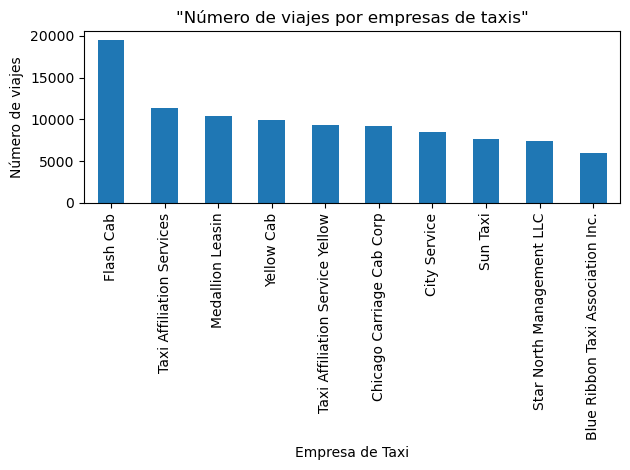

In [26]:
plt.figure(figsize=(12, 6))
top_companies = company_trips.head(10)
top_companies.plot(kind='bar', x='company_name', y='trips_amount', title='"Número de viajes por empresas de taxis"', rot=90, xlabel='Empresa de Taxi', ylabel='Número de viajes',legend=False)
plt.tight_layout()
plt.show()

- Comentario

Para fines de éste análisis elegí representar en la gráfica las 10 empresas con mayor cantidad de viajes. La empresa con cantidad superior de viajes en quince y dieciséis de noviembre del 2017 es Flash Cab, de ahí éste número disminuye casi a la mitad en el resto de las empresas de taxis.

**Gráfico de los diez principales barrios por promedio de viajes finalizados**

<Figure size 1200x600 with 0 Axes>

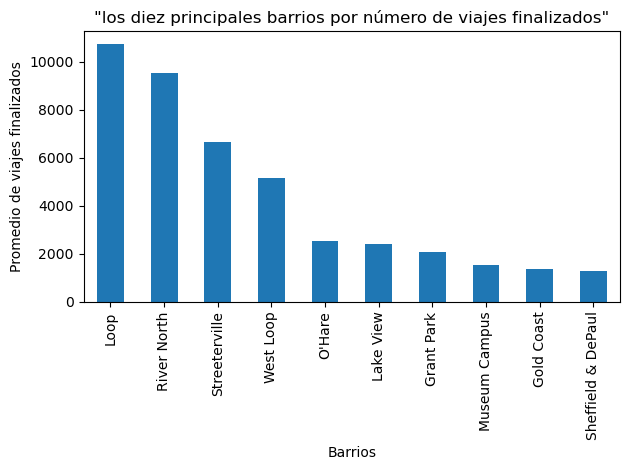

In [27]:
plt.figure(figsize=(12, 6))
top_dropoff_location.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='"los diez principales barrios por número de viajes finalizados"', rot=90, xlabel='Barrios', ylabel='Promedio de viajes finalizados',legend=False)
plt.tight_layout()
plt.show()

- Comentario 

En el mes de noviembre del 2017, los barrios que registraron el promedio superior de viajes finalizados fueron Loop y River North, de ahí el promedio fue disminuyendo en el resto de los barrios.

# Prueba de Hipótesis (Paso 5)

**Explorar los datos**

In [28]:
Loop_OHare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [29]:
Loop_OHare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [30]:
Loop_OHare_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [31]:
Loop_OHare_trips.duplicated().sum()

197

In [32]:
Loop_OHare_trips = Loop_OHare_trips.drop_duplicates()

In [33]:
Loop_OHare_trips.duplicated().sum()

0

In [34]:
Loop_OHare_trips.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

- Valores atípicos

In [35]:
z_scores = stats.zscore(Loop_OHare_trips['duration_seconds'])

In [36]:
Loop_OHare_trips_no_outliers = Loop_OHare_trips[(z_scores < 3) & (z_scores > -3)]

In [37]:
print(Loop_OHare_trips_no_outliers)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1060  2017-11-04 14:00:00               Good            2700.0
1061  2017-11-18 16:00:00                Bad            2186.0
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1067  2017-11-04 16:00:00                Bad            2834.0

[866 rows x 3 columns]


In [38]:
Loop_OHare_trips_no_outliers = Loop_OHare_trips

-Comentario

En este conjunto de datos no hay datos nulos, se encontraron 197 datos duplicados que fueron eliminados, el tipo de dato es el correcto y fueron eliminados valores atípicos.

**Prueba de hipótesis**

-La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Esta hipótesis que se pondrá a prueba establece que existe un efecto o cambio por lo cual se considera como hipótesis alternativa.

#H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.

#H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [39]:
alpha = 0.05

sample_1 = Loop_OHare_trips.loc[Loop_OHare_trips['weather_conditions'] == 'Good', 'duration_seconds']

sample_1


0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1057    2492.0
1059    1303.0
1060    2700.0
1063       0.0
1064    1318.0
Name: duration_seconds, Length: 723, dtype: float64

In [40]:
sample_2 = Loop_OHare_trips.loc[Loop_OHare_trips['weather_conditions'] == 'Bad', 'duration_seconds']

sample_2

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 148, dtype: float64

In [41]:
from scipy import stats as st

resultados = st.ttest_ind(sample_1, sample_2, equal_var= False)
print(f'p-value:{resultados.pvalue}')

p-value:9.126383933880083e-08


In [42]:
if resultados.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Podemos rechazar la hipótesis nula


- Comentario

  El resultado de la prueba de hipótesis es que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [43]:
Good_weather = Loop_OHare_trips.loc[Loop_OHare_trips['weather_conditions'] == 'Good', 'duration_seconds']

In [44]:
np.var(Good_weather)

597389.5417434272

In [45]:
Bad_weather = Loop_OHare_trips.loc[Loop_OHare_trips['weather_conditions'] == 'Bad', 'duration_seconds']

In [46]:
np.var(Bad_weather)

561003.0958729

**Prueba levene**

In [47]:
stat, p_value_levene = st.levene(Good_weather, Bad_weather )
print(f'Estadístico de Levene: {stat}')
print(f'p-value de Levene: {p_value_levene}')

Estadístico de Levene: 0.000586951625283602
p-value de Levene: 0.9806770360671218


In [48]:
alpha = 0.05
equal_var = p_value_levene > alpha

if equal_var:
    print("No se rechaza la hipótesis nula: las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales.")

No se rechaza la hipótesis nula: las varianzas son iguales.


**Prueba t de Student**

In [49]:
resultados_ttest = st.ttest_ind(Good_weather, Bad_weather, equal_var=False)
print(f'Estadístico t: {resultados_ttest.statistic}')
print(f'p-value de la prueba t: {resultados_ttest.pvalue}')

Estadístico t: -5.531968188074177
p-value de la prueba t: 9.126383933880083e-08


In [50]:
if resultados_ttest.pvalue < alpha:
    print("Se rechaza la hipótesis nula: las puntuaciones promedio son diferentes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que las puntuaciones promedio son diferentes.")

Se rechaza la hipótesis nula: las puntuaciones promedio son diferentes.


- Comentario 
La prueba de Levene mostró que las varianzas de los dos grupos son iguales.La prueba t de Student mostró que las medias de los dos grupos son significativamente diferentes. En conclusión, aunque las varianzas de los grupos son similares, las medias de los grupos difieren de manera significativa. Esto indica que, aunque la dispersión (varianza) de los datos en ambos grupos es similar, sus valores promedio son distintos.

# Conclusión general del Proyecto 

* Para realizar el proyecto cargué las librerías necesarias para poder realizar los análisis solicitados. 

* Para la recuperación y análisis de Datos Climáticos se realizó una solicitud HTTP al URL proporcionado, que apunta a una página HTML que contiene una tabla con datos climáticos de Chicago para noviembre de 2017, se utilizó BeautifulSoup para analizar el contenido HTML de la página, facilitando la extracción de datos específicos. En este caso, la tabla de interés se seleccionó utilizando su atributo id (weather_records). Se extrajeron los encabezados de la tabla (nombres de columnas) recorriendo todas las etiquetas <th> (table headers) y almacenando sus textos en la lista heading_table.Se recorrieron las filas de la tabla (<tr>) que contienen datos (<td>), excluyendo las que contienen encabezados (<th>). Los datos extraídos se almacenaron en la lista content.Finalmente, se creó un DataFrame de Pandas con los datos extraídos, utilizando la lista content como los datos y heading_table como los nombres de las columnas. 
    
* Para el análisis exploratorio de datos con SQL
 1. Esta consulta cuenta el número de viajes realizados por cada empresa de taxis en el rango de fechas especificado (15-16 de noviembre de 2017) y devuelve una lista ordenada de empresas por cantidad de viajes en orden descendente. Se seleccionan dos campos para la salida: company_name de la tabla cabs, que es el nombre de la empresa de taxis.COUNT(trips.trip_id) AS trips_amount, que cuenta el número de viajes (trip_id) de la tabla trips y lo nombra como trips_amount. Se realiza una unión interna (INNER JOIN) entre las tablas cabs y trips utilizando el campo cab_id, que es común a ambas tablas. Esto permite relacionar cada viaje con su correspondiente empresa de taxis. Se filtran los registros para incluir solo aquellos viajes cuyo campo start_ts (fecha y hora de inicio del viaje) cae entre el 15 y el 16 de noviembre de 2017. Se utiliza CAST para convertir start_ts a un tipo de dato de fecha (date) y así facilitar la comparación.Los resultados se agrupan por el nombre de la empresa de taxis (company_name). Esto significa que el conteo de viajes se realiza para cada empresa de taxis por separado.Finalmente, los resultados se ordenan en orden descendente según trips_amount, mostrando primero las empresas con la mayor cantidad de viajes.
 2. Esta consulta recupera y cuenta la cantidad de viajes de taxis realizados por empresas cuyo nombre contiene las palabras "Yellow" o "Blue" en un rango de fechas específico.Combina los resultados de ambas consultas utilizando UNION ALL para obtener una lista completa de todas las empresas de taxis con las palabras "Yellow" o "Blue" en su nombre junto con la cantidad de viajes que realizaron en el rango de fechas especificado.
 3. Este código SQL cuenta el número de viajes de taxis entre el 1 y el 7 de noviembre de 2017, clasificando las empresas de taxis en tres grupos: "Flash Cab," "Taxi Affiliation Services," y "Other" (cualquier otra empresa).Luego, muestra estas categorías junto con la cantidad de viajes, ordenándolas de mayor a menor.
    
 * Prueba de Hipótesis sobre la Duración de Viajes en Condiciones Meteorológicas Específicas
   
 1. Este código SQL recupera los identificadores y nombres de barrios de la tabla neighborhoods cuyo nombre contiene las palabras "Hare" o "Loop."Esta consulta selecciona los identificadores (neighborhood_id) y los nombres (name) de los barrios en la tabla neighborhoods que cumplen con la condición de tener "Hare" al final de su nombre o contener "Loop" en cualquier parte del nombre.
 2. Este código SQL clasifica las condiciones climáticas en "Bad" (malo) o "Good" (bueno) basándose en las descripciones de las condiciones meteorológicas de la tabla weather_records. Este código selecciona la fecha y hora (ts) de cada registro meteorológico y clasifica las condiciones climáticas en "Bad" si incluyen palabras relacionadas con lluvia o tormenta. En caso contrario, las clasifica como "Good." El resultado es una tabla con la fecha, hora y una categoría simplificada de las condiciones climáticas.
 3. Este código SQL recupera información sobre viajes en taxi, específicamente aquellos que comenzaron en el barrio "Loop" y terminaron en el Aeropuerto Internacional O'Hare (utilizando los IDs de los barrios) los sábados. Los resultados incluyen la fecha y hora de inicio, las condiciones climáticas y la duración de cada viaje, ordenados por el identificador del viaje.

 * Análisis Exploratorio de Datos Adicional con Python
   
Incorporé la base de datos y ocupé los  métodos head, info y describe para explorar la cantidad y los tipos de datos, la información de las columnas y los datos estadísticos, la detección de datos ausentes y eliminación de datos duplicados de este grupo de datos. Se identificaron los 10 principales barrios en términos de finalización, se realizaron los  gráficos: empresas de taxis Vs número de viaje y los 10 barrios principales por número de viajes finalizados. La empresa con cantidad superior de viajes en quince y dieciséis de noviembre del 2017 es Flash Cab, de ahí éste número disminuye casi a la mitad en el resto de las empresas de taxis. En el mes de noviembre del 2017, los barrios que registraron el promedio superior de viajes finalizados fueron Loop y River North, de ahí el promedio fue disminuyendo en el resto de los barrios.
 
* Prueba de Hipótesis
  
Incorporé la base de datos y ocupé los  métodos head, info y describe para explorar la cantidad y los tipos de datos, la información de las columnas y los datos estadísticos de este grupo de datos. Al probar la hipótesis -La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos se considero como hipótesis alternativa (establece que hay un cambio). El resultado del análisis fue que podemos rechazar la hipótesis nula, es decir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

La prueba de Levene se utilizó para comprobar si las varianzas entre los dos grupos (sábados lluviosos y no lluviosos) son iguales. Dado que el valor p es mucho mayor que el nivel de significancia común (0.05), no se rechaza la hipótesis nula. Esto significa que las varianzas de las duraciones de los viajes en los dos grupos son iguales.

La prueba t se usó para comparar las medias de duración de los viajes en los sábados lluviosos y no lluviosos. El valor p es extremadamente bajo (muy inferior a 0.05), lo que indica que se rechaza la hipótesis nula. Esto implica que existe una diferencia significativa en las duraciones promedio de los viajes entre los dos grupos.

Conclusión de la prueba de hipótesis: los resultados indican que hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos en comparación con los sábados no lluviosos. Esto sugiere que las condiciones climáticas (lluvia) tienen un impacto significativo en la duración de los viajes.